In [1]:
import numpy as np
from matplotlib import pyplot as plt

from experiment_utils import run_experiment_with_coordinate_masking, prepare_glove, plot_chosen_results


In [2]:
masked_coord_counts = [8, 10, 12]

In [26]:
prepare_glove(25, masked_coord_counts, True)

Prepare glove-25 data
compute test scores for models with masked coordinates


In [3]:
results_recall_5 = run_experiment_with_coordinate_masking(
    "glove_25", 25, masked_coord_counts, recall_top_len=5,
    n_search_threads=8, recalc_graphs=False, verbose=True
)

In [4]:
results_recall_1 = run_experiment_with_coordinate_masking(
    "glove_25", 25, masked_coord_counts, recall_top_len=1,
    n_search_threads=8, recalc_graphs=False, verbose=True
)

In [5]:
# def plot_chosen_results(results, keys=None, xlim=None, ylim=None,
#                         hlines=None, vlines=None, x_log_scale=False,
#                         figsize=(10, 10), ylabel="recall", relabeling=None,
#                         file_name=None, dpi=100):
#     plt.figure(figsize=figsize)
#     plt.xlabel("Number of distance computations")
#     plt.ylabel(ylabel)
#     if keys is None:
#         keys = results.keys()
#     if xlim is not None:
#         plt.xlim(xlim)
#         if hlines is not None:
#             plt.hlines(hlines, *xlim, color="grey", alpha=0.5)
#             plt.yticks(hlines)
#     if ylim is not None:
#         plt.ylim(ylim)
#         if vlines is not None:
#             plt.vlines(vlines, *ylim, color="grey", alpha=0.5)
#             plt.xticks(vlines)
#     if relabeling is None:
#         relabeling = {}
#     if x_log_scale:
#         plt.xscale("log")
    
#     for key in keys:
#         assert key in results
#         r = results[key]
#         x = r["evals"]
#         y = r["recall"]
#         plt.plot(x, y, label=relabeling.get(key, key))
# #         if len(x) < 100:
# #             plt.scatter(x, y, s=3)
#     plt.legend()
#     if file_name is not None:
#         plt.savefig(file_name, dpi=dpi)
#     plt.show()


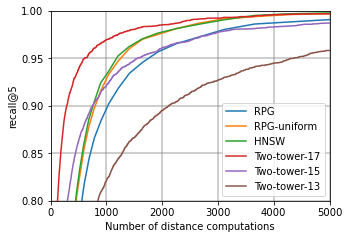

In [6]:
plot_chosen_results(
    results_recall_5, keys=[
        "rpg",
        "rpg_unifrom_train",
        "hnsw",
        '8_masked_coords+rerank',
        '10_masked_coords+rerank',
        '12_masked_coords+rerank'
    ],
    xlim=(0, 5000), ylim=(0.8, 1),
    hlines=np.linspace(0.8, 1, 5),
    vlines=np.linspace(0, 5000, 6),
    ylabel="recall@5",
    figsize=(5, 3.5),
    relabeling={
        "rpg": "RPG",
        "hnsw": "HNSW",
        "rpg_unifrom_train": "RPG-uniform",
        '8_masked_coords+rerank': "Two-tower-17",
        '10_masked_coords+rerank': "Two-tower-15",
        '12_masked_coords+rerank': "Two-tower-13"
    },
    file_name="pic/glove_25_dpi_300.pdf",
    dpi=300
)

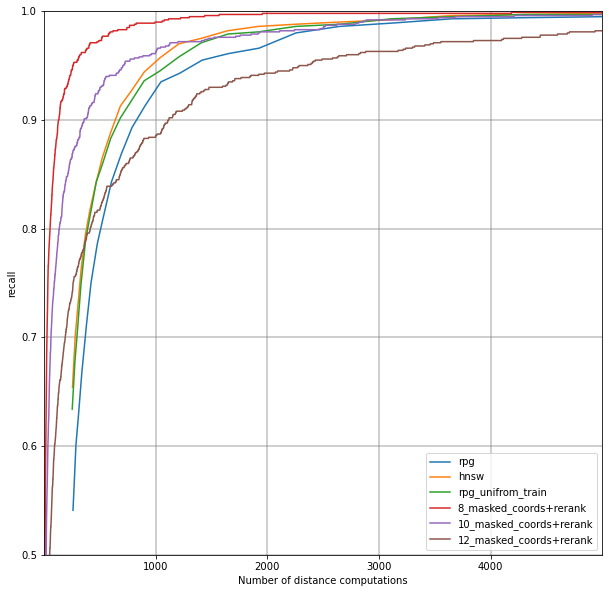

In [6]:
plot_chosen_results(
    results_recall_1, keys=[
        "rpg", "hnsw", "rpg_unifrom_train",
        '8_masked_coords+rerank',
        '10_masked_coords+rerank',
        '12_masked_coords+rerank'
    ],
    xlim=(0, 5000), ylim=(0.5, 1),
    hlines=np.linspace(0.5, 1, 6),
    vlines=np.linspace(1000, 4000, 4)
)